### Imports

In [24]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline   
#To print the plots in script 


### Preparing a toy dataset 


In [28]:
#####################
### DATASET 
#####################
data = np.genfromtxt('perceptron_toydata.txt' , delimiter = '\t')  
#reads data from file 'perceptron_toydata.txt' ,#delimiter in \t , i.e a tab 
X,y = data[: , :2] , data[: ,2]  

#X : first two columns 
#y : last column
y = y.astype(int) 
#y has integer type from numpy : converting y from text from numbers 


print('Class label counts: ', np.bincount(y))
print('X.shape: ' ,X.shape)
print('y.shape: ' ,y.shape)


#Shuffling & train/test split 
shuffle_idx = np.arange(y.shape[0]) 
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X , y = X[shuffle_idx] , y[shuffle_idx]


#train test split  
X_train , X_test = X[shuffle_idx[ :70]] , X[shuffle_idx[70:]]
y_train , y_test = y[shuffle_idx[ :70]] , y[shuffle_idx[70:]]

#Normlaize(mean 0 , unit variance)
#axis = 0 : finds mean and variance of each column 
mu , sigma = X_train.mean(axis = 0 ) , X_train.std(axis = 0) 
X_train = (X_train - mu)/sigma
X_test = (X_test - mu)/sigma 



Class label counts:  [50 50]
X.shape:  (100, 2)
y.shape:  (100,)


In [29]:
X_train.std(axis = 0)

array([1., 1.])

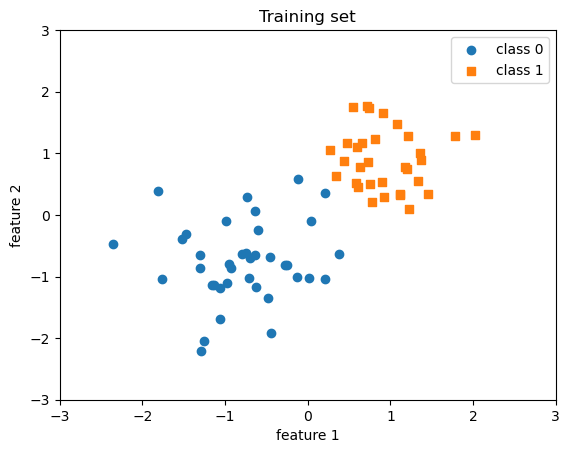

In [30]:
#Plotting the binary separable training data 
plt.scatter(X_train[y_train==0 , 0] , X_train[y_train==0 , 1] , label = "class 0" , marker = 'o')
plt.scatter(X_train[y_train==1, 0] , X_train[y_train==1 , 1] , label = 'class 1' , marker = 's')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3 ,3])
plt.ylim([-3 ,3])
plt.legend()
plt.show()

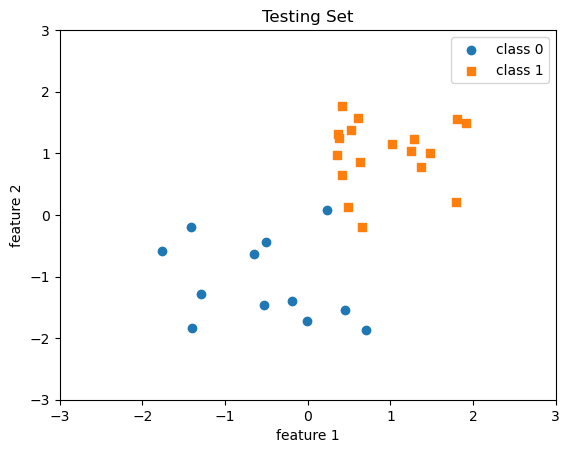

In [16]:
#Plotting the test data 
plt.scatter(X_test[y_test==0 , 0 ] , X_test[y_test==0 , 1] , label = "class 0" , marker = "o")
plt.scatter(X_test[y_test==1 , 0 ] , X_test[y_test==1 , 1] , label = "class 1" , marker = "s")
plt.title("Testing Set")
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend()
plt.show()


### Defining the Perceptron Model 

In [38]:
class Perceptron(): 
    def __init__(self,num_features): 
        #constructor
        self.num_features = num_features 
        self.weights = np.zeros((num_features , 1) ,dtype = float)
        self.bias = np.zeros(1 ,dtype = float)
        
    def forward(self,x): 
        #find net input 
        linear = np.dot(x,self.weights) + self.bias
        #activation function = threshold
        predictions = np.where(linear>0. , 1, 0)
        return predictions 
    
    #Calculates errors : Related to back propagration : update comes from gradient desecnt?
    def backward(self , x, y):
        predictions = self.forward(x)
        errors = y - predictions 
        return errors 
    
    def train(self, x, y, epochs):
        #for very iteration
        for e in range(epochs): #why for pre-specofoed number of epochs? Algorithm may not even converge! 
            print(e)
            for i in range(y.shape[0]): 
                #x[i] : reshape to 1 row 2 columns 
                #reshape(-1) : flatten it to 1D array 
                #Get errors into right dimension 
                errors = self.backward(x[i].reshape(1,self.num_features) , y[i]).reshape(-1)
                self.weights += (errors*x[i]).reshape(self.num_features,1)
                self.bias += errors
    
    def evaluate(self, x, y):
        #flatten the predictions array 
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy

                
        

### Training the Perceptron 

In [41]:
ppn = Perceptron(num_features = 2)
ppn.train(X_train , y_train , epochs = 5)

print('Model parameters: \n\n')
print(' Weights : %s\n' % ppn.weights)
print(' Bias: %s\n' % ppn.bias)


0
1
2
3
4
Model parameters: 


 Weights : [[1.27340847]
 [1.34642288]]

 Bias: [-1.]



### Evaluating the Model

In [42]:
train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' %(train_acc*100))

Train set accuracy: 100.00%


In [43]:
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' %(test_acc * 100))

Test set accuracy: 93.33%


### Drawing the decision boundary 

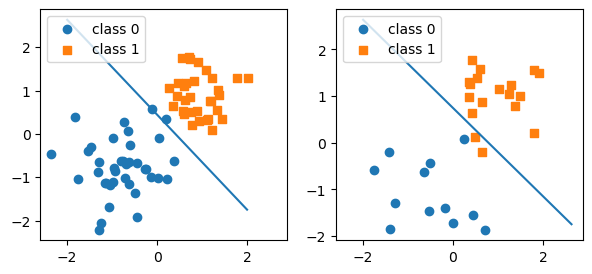

In [47]:
#######################
##2D Decision Boundary
#######################

w , b = ppn.weights , ppn.bias

# x0*w0 + x1*w1 + b = 0
# x1  = (-x0*w0 - b) / w1

x0_min = -2 
x1_min = (( -x0_min * w[0] - b[0]) /w[1])  

x0_max = 2 
x1_max = ( (-x1_min * w[0] - b[0]) /w[1]) 

#divide the panel in two parts
fig , ax = plt.subplots(1 ,2,sharex = True , figsize= (7,3))

#On left, plot decision boundary for training data
ax[0].plot([x0_min , x0_max] , [x1_min , x1_max])
ax[0].scatter(X_train[y_train==0 , 0] , X_train[y_train == 0 , 1] , label = "class 0" , marker = 'o')
ax[0].scatter(X_train[y_train==1 , 0] , X_train[y_train==1 , 1] , label = "class 1" , marker = 's')
ax[0].legend(loc = 'upper left')

#On right, plot decision boundary for testing data 
ax[1].plot([x0_min , x1_min] , [x1_min , x1_max])
ax[1].scatter(X_test[y_test==0, 0] , X_test[y_test==0 , 1] , label = "class 0" , marker = 'o')
ax[1].scatter(X_test[y_test==1, 0] , X_test[y_test==1, 1] , label = 'class 1' , marker = 's')

ax[1].legend(loc = 'upper left')

plt.show()


